# Automatic Patent Classification

In [1]:
import os
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
plt.style.use("classic")
sns.set()
from time import time

## Pre-processing...

### Importing data into pandas.DataFrame

In [2]:
### Importing data into pandas.DataFrame

# load data frame
corpora = pd.read_csv('dataset_ipc_first.csv', sep = '|', encoding = 'latin-1')

# create ipc_level1 column with IPC first level category
categories = pd.DataFrame()
categories['ipc_level1'] = corpora.apply(lambda row: row['ipc'][0:1], axis=1)

# # reducing number of rows to 5000
# corpora = corpora[0:4999]
# categories = categories[0:4999]

### First look on data

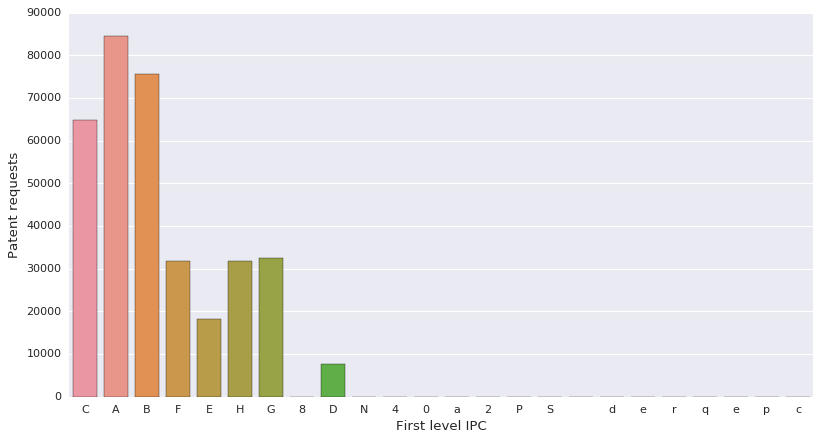

Total count of patent requests:  347064


In [3]:
### first look on data
plt.figure(figsize=(12,6))
ax = sns.countplot(x="ipc_level1", data=categories)
plt.ylabel('Patent requests', fontsize=12)
plt.xlabel('First level IPC', fontsize=12)
plt.xticks(rotation='horizontal')
plt.show()
print('Total count of patent requests: ', len(categories))

### Cleaning data frame - only IPC first level categories

A    84529
B    75729
C    64728
G    32561
H    31854
F    31792
E    18220
D     7619
Name: ipc_level1, dtype: int64


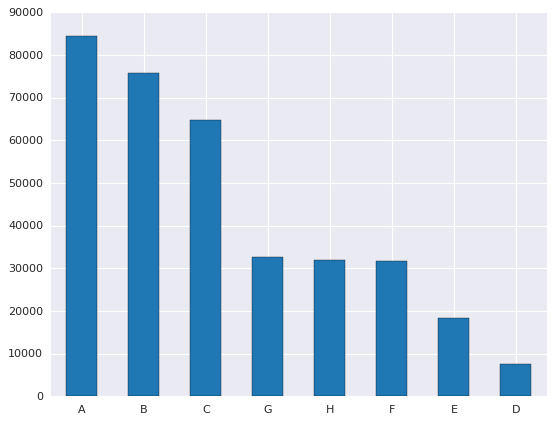

Total count on IPC first level categories (A to H):  347032


In [4]:
### Cleaning data frame - only IPC first level categories

# Analysing distribution of patent requests in the 8 IPC top level categories (level 1)
values = categories.ipc_level1.value_counts().nlargest(n=8)
values.plot(kind = 'bar', colormap = 'tab20')
plt.xticks(rotation='horizontal')
print(values)
plt.show()
print('Total count on IPC first level categories (A to H): ', values.sum())

# Separating X_AH & y_AH with only IPC first level categories
corpora_AH = corpora.drop('ipc', axis=1)
corpora_AH = corpora_AH[(categories.ipc_level1 == 'A') | (categories.ipc_level1 == 'B') |
                        (categories.ipc_level1 == 'C') | (categories.ipc_level1 == 'D') |
                        (categories.ipc_level1 == 'E') | (categories.ipc_level1 == 'F') |
                        (categories.ipc_level1 == 'G') | (categories.ipc_level1 == 'H')]
categories_AH = categories[(categories.ipc_level1 == 'A') | (categories.ipc_level1 == 'B') |
                        (categories.ipc_level1 == 'C') | (categories.ipc_level1 == 'D') |
                        (categories.ipc_level1 == 'E') | (categories.ipc_level1 == 'F') |
                        (categories.ipc_level1 == 'G') | (categories.ipc_level1 == 'H')]

### Patent Requests IPC first level categories distribution

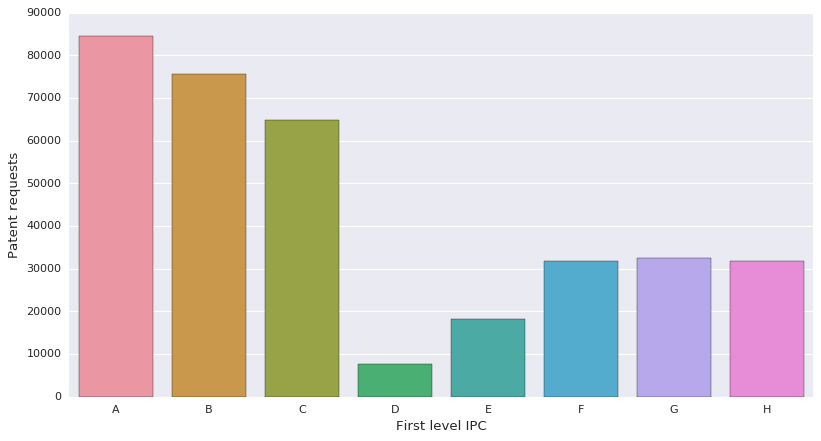

Total count on IPC first level categories (A to H):  347032


In [5]:
### Patent Request IPC first level categories distribution
plt.figure(figsize=(12,6))
ax = sns.countplot(x="ipc_level1", data=categories_AH.sort_values(by='ipc_level1', ascending=True))
plt.ylabel('Patent requests', fontsize=12)
plt.xlabel('First level IPC', fontsize=12)
plt.xticks(rotation='horizontal')
plt.show()
print('Total count on IPC first level categories (A to H): ', len(categories_AH))

## Extracting features...

### Corpora vectorization

In [6]:
# Vectorization
from time import time
from sklearn.feature_extraction.text import CountVectorizer
# ngram_range = (1, 1), max_df = .95, min_df = 1
print('Extracting features...')
vec = CountVectorizer()
t0 = time()
X_title = vec.fit_transform(corpora_AH.title.values.astype('U'))
print('Title count matrix shape: ', X_title.shape)
X_resume = vec.fit_transform(corpora_AH.resume.values.astype('U'))
print('Resume count matrix shape: ', X_resume.shape)
print('done in %0.3fs.' % (time() - t0))

Extracting features...
Title count matrix shape:  (347032, 64585)


MemoryError: 

#### Reducing deminsionality

In [ ]:
### Reducing deminsionality with SVD
from sklearn.decomposition import TruncatedSVD

print('Reducing dimensionality...')
svd = TruncatedSVD(n_components = 500)
t0 = time()
X_title = svd.fit_transform(X_tfidf_title)
print('Title most relevant features matrix shape: ', X_title.shape)
X_resume = svd.fit_transform(X_tfidf_resume)
print('Resume most relevant features matrix shape: ', X_resume.shape)
print('done in %0.3fs.' % (time() - t0))

### Categories binarizer

In [7]:
from sklearn.preprocessing import LabelBinarizer
y = LabelBinarizer().fit_transform(categories_AH.values)
print(y)

[[0 0 1 ..., 0 0 0]
 [0 0 1 ..., 0 0 0]
 [0 0 1 ..., 0 0 0]
 ..., 
 [0 1 0 ..., 0 0 0]
 [1 0 0 ..., 0 0 0]
 [0 0 0 ..., 0 0 0]]
